<a href="https://colab.research.google.com/github/AngelPn/Fake-News-Detector/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authors
- 1115201800141 - Αγγελική Παναγοπούλου
- 1115201800142 - Θεοδώρα Παντελιού

# Detection of Fake News with Data Mining


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np
# For preprocessing
import spacy
# For wordcloud generating 
from wordcloud import WordCloud
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# For bigrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# For word embeddings
!pip install --upgrade gensim
from gensim.models import Word2Vec

     |████████████████████████████████| 23.9MB 155kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Load Datasets
Read the data from News_dataset directory using pandas read_csv method. News_dataset stores Fake.csv and True.csv files that keep fake and non-fake news respectively.

In [ ]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/True.csv'

df_true = pd.read_csv(Location)
df_true.info()
df_true.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [ ]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/Fake.csv'

df_fake = pd.read_csv(Location)
df_fake.info()
df_fake.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [ ]:
df_true = df_true.head(3000)
df_true.info()

df_fake = df_fake.head(3000)
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


# Preprocessing
Τhe preprocessing is performed using the spaCy library of python as follows:
* Tokenization
* Lemmatization: using spaCy's built-in methods.
* Converting all the words to lower case
* Stopword Removal: using the "is_stop" attribute of the token object.
* Removing Punctuations: using "isalpha" method of string objects.


In [ ]:
# Instantiate English module
nlp = spacy.load("en_core_web_sm")

def preprocessing(df):
  df = df[~df.text.isna() & ~df.title.isna()] # remove NA values

  for i, row in df.iterrows():
    # Create doc object from title
    doc = nlp(row['title'].lower())
    # Filter our tokens
    lemmatized = [token.lemma_ for token in doc if (token.is_stop == False and token.text.isalpha() == True)]
    df.iloc[i]['title'] = ' '.join(lemmatized)
    
    # Create doc object from title
    doc = nlp(row['text'].lower())
    # Filter our tokens
    lemmatized = [token.lemma_ for token in doc if (token.is_stop == False and token.text.isalpha() == True)]
    df.iloc[i]['text'] =  ' '.join(lemmatized)
  
  return df


In [ ]:

df_true_clean = preprocessing(df_true)
df_true_clean.info()
df_true_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


title  ...                date
0   budget fight loom republicans flip fiscal script  ...  December 31, 2017 
1  military accept transgend recruit monday pentagon  ...  December 29, 2017 
2       senior republican senator let mr mueller job  ...  December 31, 2017 
3  fbi russia probe help australian diplomat tip nyt  ...  December 30, 2017 
4   trump want postal service charge amazon shipment  ...  December 29, 2017 

[5 rows x 4 columns]

In [ ]:
df_fake_clean = preprocessing(df_fake)
df_fake_clean.info()
df_fake_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


title  ...               date
0  donald trump send embarrass new year eve messa...  ...  December 31, 2017
1  drunk bragging trump staffer start russian col...  ...  December 31, 2017
2  sheriff david clarke internet joke threaten po...  ...  December 30, 2017
3            trump obsessed obama code website image  ...  December 29, 2017
4    pope francis call donald trump christmas speech  ...  December 25, 2017

[5 rows x 4 columns]

# Overview of data

## Titles visualization
Wordclouds to visualise the most common titles in fake and non-fake news.

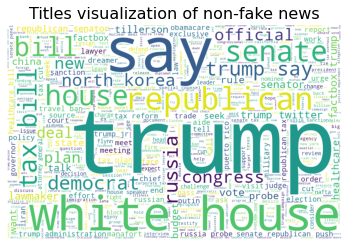

In [ ]:
wordcloud = WordCloud(max_words=1000,width=840, height=540, background_color="white").generate(' '.join(df_true_clean['title'].tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Titles visualization of non-fake news', fontsize = 16)
plt.show()


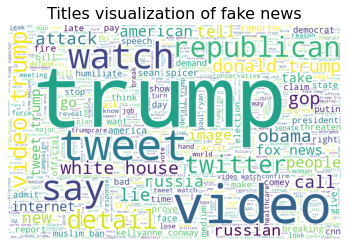

In [ ]:
wordcloud = WordCloud(max_words=1000,width=840, height=540, background_color="white").generate(' '.join(df_fake_clean['title'].tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Titles visualization of fake news', fontsize = 16)
plt.show()


## Average number of characters
The function below gets as arguments a dataframe and a name of a column and returns the average number of characters for that column.

In [ ]:
def average_chars_column(df, column):
  count = []
  for i, row in df.iterrows():
    count.append(len(row[column]))

  return sum(count)/len(count)


Graph that shows the average number of characters in title column for fake and non-fake news.

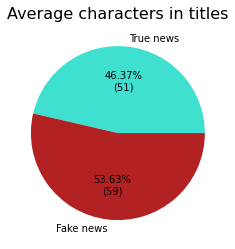

<Figure size 864x864 with 0 Axes>

In [ ]:
av_true = average_chars_column(df_true_clean, 'title')
av_fake = average_chars_column(df_fake_clean, 'title')

plt.pie(x = [av_true, av_fake], 
        labels = ['True news', 'Fake news'],
        colors = ['turquoise', 'firebrick'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(av_true+av_fake)))
plt.title('Average characters in titles', fontsize = 16)
plt.show()

Graph that shows the average number of characters in text column for fake and non-fake news.

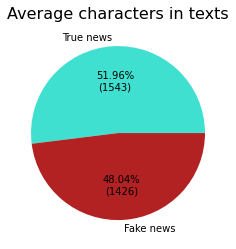

In [ ]:
av_true = average_chars_column(df_true_clean, 'text')
av_fake = average_chars_column(df_fake_clean, 'text')

plt.pie(x=[av_true, av_fake], 
        labels=['True news', 'Fake news'], 
        colors=['turquoise', 'firebrick'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(av_true+av_fake)))
plt.title('Average characters in texts', fontsize = 16)
plt.show()

## Distribution of the number of words
The function below gets as arguments a dataframe and a name of a column and returns the number of words for that column.

In [ ]:
def wordCount(df, column):
    return (df[column].str.count(' ')+1).sum()


### Dirty datasets
The distribution of number of words for the initial (dirty) datasets.

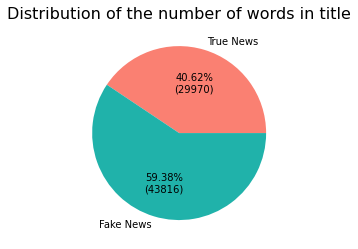

In [ ]:
count_title_true = wordCount(df_true, 'title')
count_title_fake = wordCount(df_fake, 'title')

plt.pie(x=[count_title_true, count_title_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_title_fake+count_title_true)))
plt.title('Distribution of the number of words in title', fontsize = 16)
plt.show()

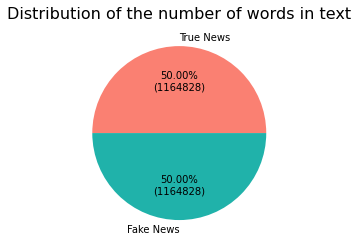

In [ ]:
count_text_true = wordCount(df_true, 'text')
count_text_fake = wordCount(df_true, 'text')

plt.pie(x=[count_text_true, count_text_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_text_fake+count_text_true)))
plt.title('Distribution of the number of words in text', fontsize = 16)
plt.show()

### Clean datasets
The distribution of number of words for the clean datasets removed from stopwords.

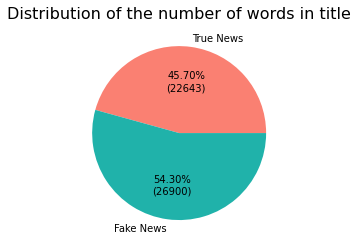

In [ ]:
count_title_true = wordCount(df_true_clean, 'title')
count_title_fake = wordCount(df_fake_clean, 'title')

plt.pie(x=[count_title_true, count_title_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_title_fake+count_title_true)))
plt.title('Distribution of the number of words in title', fontsize = 16)
plt.show()

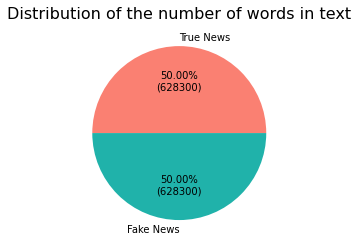

In [ ]:
count_text_true = wordCount(df_true_clean, 'text')
count_text_fake = wordCount(df_true_clean, 'text')

plt.pie(x=[count_text_true, count_text_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_text_fake+count_text_true)))
plt.title('Distribution of the number of words in text', fontsize = 16)
plt.show()

## The most common bigrams
The function below returns the most k common bigrams given a dataframe's column.

In [ ]:
def get_topk_bigrams(column, k = 20):
  "  returns bigram_names, bigram_counts "

  # Find bigrams through CountVectorizer
  bow_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', binary=True, max_features=k)
  bow_representation = bow_vectorizer.fit_transform(column)
  print(bow_vectorizer.get_feature_names())

  # To find the most common bigrams find the sum of each column
  bigram_counts = bow_representation.toarray().sum(axis=0)
  print(bigram_counts)

  df_sorted = pd.DataFrame(zip(bigram_counts, bow_vectorizer.get_feature_names()), 
                           columns=['bigram_counts', 'bigram_names'])
  df_sorted.sort_values(by='bigram_counts', inplace=True)

  return df_sorted['bigram_names'], df_sorted['bigram_counts']


Most common bigrams in titles.

['attorney general', 'factbox trump', 'house panel', 'house speaker', 'north korea', 'puerto rico', 'republican senator', 'republican tax', 'russia probe', 'say trump', 'special counsel', 'tax cut', 'tax plan', 'tax reform', 'travel ban', 'trump administration', 'trump jr', 'trump say', 'trump twitter', 'white house']
[ 28  72  27  31  96  34  57  35  50  31  27  42  44  46  36  54  36 110
  76 188]


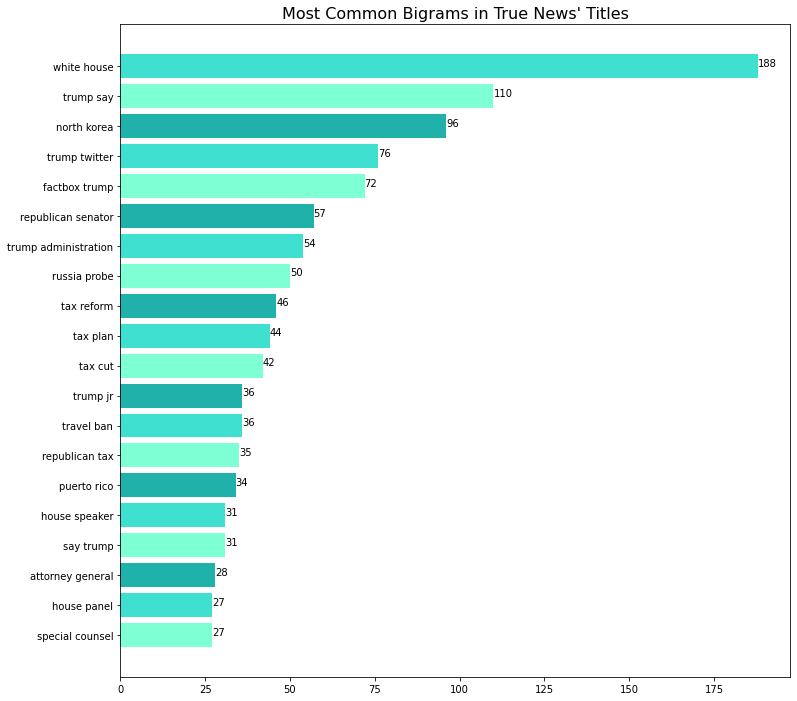

In [ ]:
names, counts = get_topk_bigrams(df_true_clean['title'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['aquamarine', 'turquoise', 'lightseagreen'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))

plt.title("Most Common Bigrams in True News' Titles", fontsize = 16)
plt.show()

['donald trump', 'fake news', 'fox news', 'gop rep', 'ivanka trump', 'john mccain', 'kellyanne conway', 'muslim ban', 'new york', 'paul ryan', 'say trump', 'sean spicer', 'trump administration', 'trump jr', 'trump supporter', 'trump try', 'trump tweet', 'watch trump', 'white house', 'white supremacist']
[109  26  65  23  29  24  56  48  23  33  29  60  24  30  24  27  26  39
 105  30]


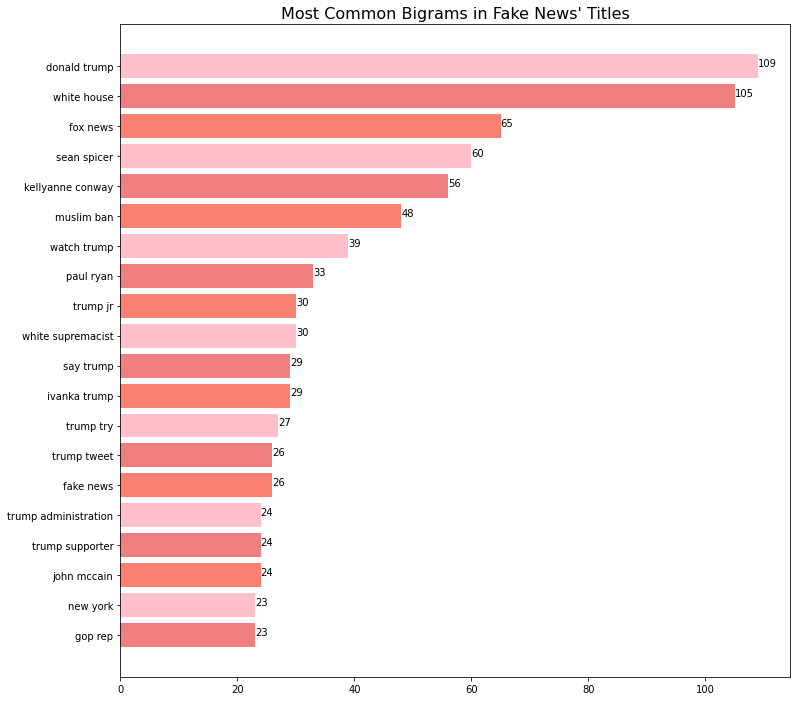

In [ ]:
names, counts = get_topk_bigrams(df_fake_clean['title'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['lightcoral', 'pink', 'salmon'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in Fake News' Titles", fontsize = 16)
plt.show()

Most common bigrams in texts.

['barack obama', 'donald trump', 'house representatives', 'national security', 'new york', 'north korea', 'official say', 'president barack', 'president donald', 'republican senator', 'reuters president', 'say statement', 'say trump', 'tell reporter', 'trump administration', 'trump campaign', 'trump say', 'united states', 'washington reuters', 'white house']
[ 468 2172  685  276  501  277  331  403 2047  392  608  560  342  526
  551  308  507  913 1871 1066]


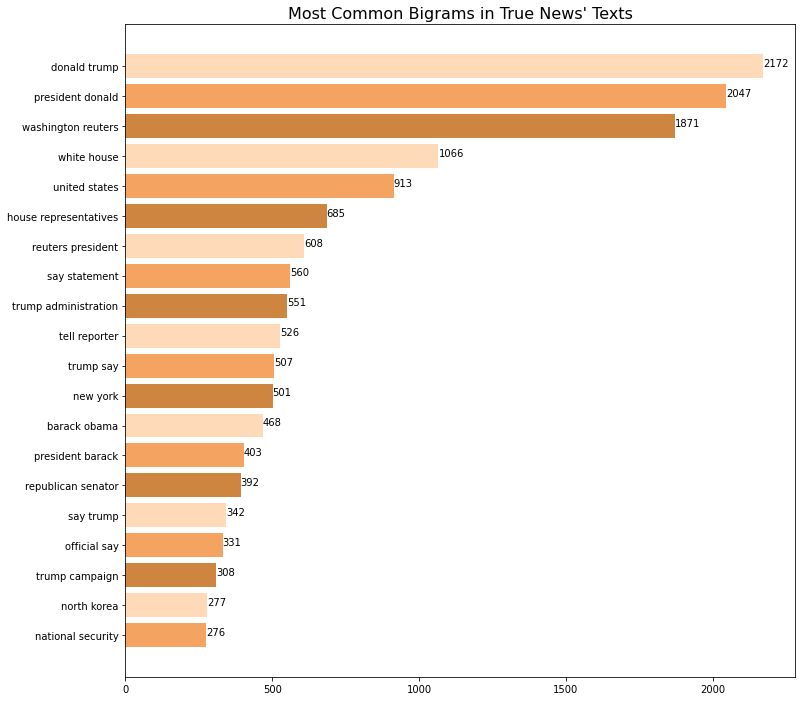

In [ ]:
names, counts = get_topk_bigrams(df_true_clean['text'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['sandybrown', 'peachpuff', 'peru'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in True News' Texts", fontsize = 16)
plt.show()

['american people', 'chip somodevilla', 'donald trump', 'fake news', 'feature image', 'fox news', 'getty image', 'hillary clinton', 'look like', 'new york', 'pool getty', 'president obama', 'president trump', 'screen capture', 'somodevilla getty', 'trump administration', 'trump campaign', 'trump say', 'united states', 'white house']
[ 275  270 2110  267  459  262 2018  294  250  354  262  366  308  285
  256  404  232  352  600 1034]


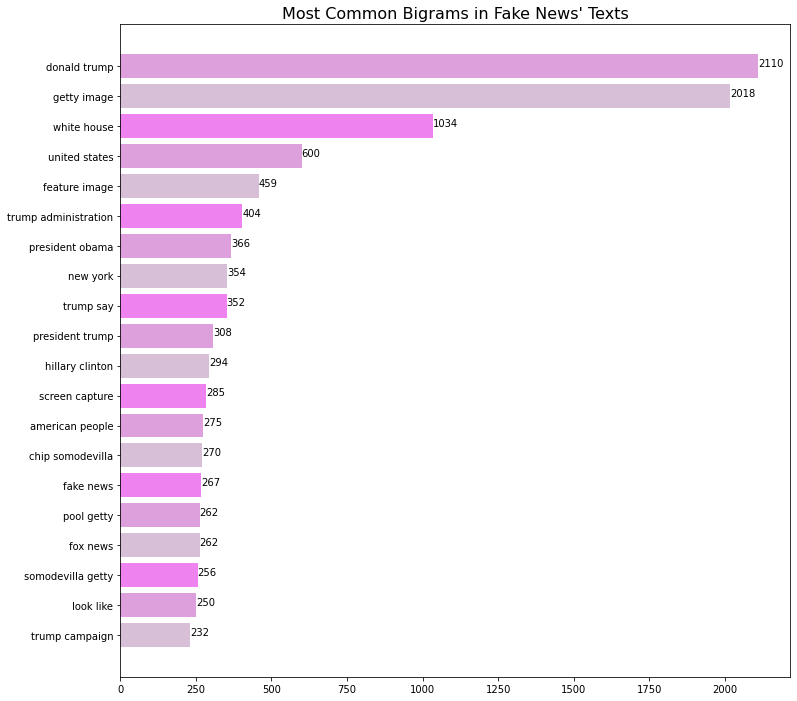

In [ ]:
names, counts = get_topk_bigrams(df_fake_clean['text'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['thistle', 'plum', 'violet'])
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in Fake News' Texts", fontsize = 16)
plt.show()

# Creation of train and test csv files


In [ ]:
dftrain_true = df_true_clean[:2000]
dftest_true = df_true_clean[2001:]

dftrain_fake = df_fake_clean[:2000]
dftest_fake = df_fake_clean[2001:]

dftrain_true.insert(4, 'label', 1)
dftest_true.insert(4, 'label', 1)
dftrain_fake.insert(4, 'label', 0)
dftest_fake.insert(4, 'label', 0)


dftrain = pd.concat([dftrain_true, dftrain_fake], ignore_index=True, sort=False)
dftest = pd.concat([dftest_true, dftest_fake], ignore_index=True, sort=False)

from sklearn.utils import shuffle
dftrain = shuffle(dftrain)
dftest = shuffle(dftest)

Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/train.csv'
dftrain.to_csv(Location,index=False)

Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/test.csv'
dftest.to_csv(Location,index=False)

Read csv files


In [ ]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/train.csv'

dftrain = pd.read_csv(Location)
dftrain.info()
dftrain.head()

Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/test.csv'
dftest = pd.read_csv(Location)
dftest.info()
dftest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4000 non-null   object
 1   text     4000 non-null   object
 2   subject  4000 non-null   object
 3   date     4000 non-null   object
 4   label    4000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 156.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1998 non-null   object
 1   text     1998 non-null   object
 2   subject  1998 non-null   object
 3   date     1998 non-null   object
 4   label    1998 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


title  ... label
0    lawmaker reach deal senate vote russia sanction  ...     1
1  trump list unreported terror attack absurd cit...  ...     0
2  fuse light legendary news anchor dan say trump...  ...     0
3  texas goper angrily demand voter shut complain...  ...     0
4  spicer say trump golf obama ridiculously bs re...  ...     0

[5 rows x 5 columns]

# Classification

## Word Embedding Approaches
We have to represent words in a numeric format that is understandable by the computers. Word embedding refers to the numeric representations of words.

### Bag of Words
The bag of words approach is one of the simplest word embedding approaches. We will convert a collection of text documents to a matrix of token counts with CountVectorizer. We set 'min_df = 2' to build the vocabulary ignoring terms that have a document frequency strictly lower than the given threshold. This value is a cut-off.

In [ ]:
bow_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=2, stop_words='english')

bow_representation_train = bow_vectorizer.fit_transform(dftrain.text)
print(bow_vectorizer.get_feature_names())
print(bow_representation_train.toarray())
print(bow_representation_train.shape)

bow_vectorizer.fit(dftrain.text)
bow_representation_test = bow_vectorizer.transform(dftest.text)

print(bow_vectorizer.get_feature_names())
print(bow_representation_test.toarray())
print(bow_representation_test.shape)

['aahd', 'aaron', 'aaron bernstein', 'aaron burr', 'aarp', 'aarp advocacy', 'aba', 'abadi', 'abadi office', 'abadi say', 'abandon', 'abandon effort', 'abandon end', 'abandon fundamental', 'abandon idea', 'abandon longtime', 'abandon moore', 'abandon paris', 'abandon plan', 'abandon texas', 'abandon trump', 'abandonment', 'abbas', 'abbas trump', 'abbe', 'abbe lowell', 'abbey', 'abbey cruise', 'abbot', 'abbott', 'abbott republican', 'abbott say', 'abbott sunday', 'abby', 'abc', 'abc affiliate', 'abc cbs', 'abc good', 'abc host', 'abc nbc', 'abc news', 'abc week', 'abdel', 'abdel fattah', 'abdication', 'abdoman', 'abdoman police', 'abduct', 'abduct north', 'abduction', 'abdulhamit', 'abdulhamit gul', 'abdullah', 'abdullah ii', 'abe', 'abe leader', 'abe say', 'abe trump', 'abedin', 'abedin aide', 'abedin son', 'abet', 'abhor', 'abhorrent', 'abide', 'abide citizen', 'abide federal', 'abide people', 'abide resolution', 'abide sanction', 'abigail', 'abigail disney', 'ability', 'ability access

### TF-IDF
The TF-IDF scheme is a type of bag words approach where instead of adding zeros and ones in the embedding vector, you add floating numbers that contain more useful information compared to zeros and ones. We will convert a collection of raw documents to a matrix of TF-IDF features with TfidfVectorizer. We set 'min_df = 2' to build the vocabulary ignoring terms that have a document frequency strictly lower than the given threshold. This value is a cut-off.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=2, stop_words='english')

tfidf_representation_train = tfidf_vectorizer.fit_transform(dftrain.text)

print(tfidf_vectorizer.get_feature_names())
print(tfidf_representation_train.toarray())
print(tfidf_representation_train.shape)

tfidf_vectorizer.fit(dftrain.text)
tfidf_representation_test = tfidf_vectorizer.transform(dftest.text)

print(tfidf_vectorizer.get_feature_names())
print(tfidf_representation_test.toarray())
print(tfidf_representation_test.shape)

['aahd', 'aaron', 'aaron bernstein', 'aaron burr', 'aarp', 'aarp advocacy', 'aba', 'abadi', 'abadi office', 'abadi say', 'abandon', 'abandon effort', 'abandon end', 'abandon fundamental', 'abandon idea', 'abandon longtime', 'abandon moore', 'abandon paris', 'abandon plan', 'abandon texas', 'abandon trump', 'abandonment', 'abbas', 'abbas trump', 'abbe', 'abbe lowell', 'abbey', 'abbey cruise', 'abbot', 'abbott', 'abbott republican', 'abbott say', 'abbott sunday', 'abby', 'abc', 'abc affiliate', 'abc cbs', 'abc good', 'abc host', 'abc nbc', 'abc news', 'abc week', 'abdel', 'abdel fattah', 'abdication', 'abdoman', 'abdoman police', 'abduct', 'abduct north', 'abduction', 'abdulhamit', 'abdulhamit gul', 'abdullah', 'abdullah ii', 'abe', 'abe leader', 'abe say', 'abe trump', 'abedin', 'abedin aide', 'abedin son', 'abet', 'abhor', 'abhorrent', 'abide', 'abide citizen', 'abide federal', 'abide people', 'abide resolution', 'abide sanction', 'abigail', 'abigail disney', 'ability', 'ability access

### Wrod2Vec
The advantages of using word embeddings over BoW/TF-IDF are:


*   Dimensionality reduction - significant reduction in the no. of features required to build a model.
*   It captures meanings of the words, semantic relationships and the different types of contexts they are used in.

We will work with gensim to generate new embeddings and load pre-trained ones.

In [ ]:
" Returns list of words for each tweet in data "
def get_all_words(data):
  all_words = []
  for i, row in enumerate(data):
    words = []
    for column in row:
      words += column.split()
    all_words.append(words)

  return all_words

Create Word2Vec model for train data.

In [ ]:
train_label = np.asarray(dftrain['label'])
train_data = (dftrain.drop(['label', 'date'],1)).values.tolist()

train_all_words = get_all_words(train_data) # get all words of train data as lists
print(train_all_words[0])

train_w2v = Word2Vec(train_all_words,
                    vector_size=100,
                    seed=32,
                    negative=5,
                    sg=0,
                    min_count=1,
                    window=1)

train_w2v.build_vocab(train_all_words)  # prepare the model vocabulary of train set

train_w2v.train(train_all_words, total_examples=train_w2v.corpus_count, epochs=5); # train the model

['democrat', 'ralph', 'northam', 'win', 'virginia', 'governor', 'race', 'medium', 'washington', 'reuters', 'democrat', 'ralph', 'northam', 'elect', 'tuesday', 'virginia', 'governor', 'medium', 'project', 'hand', 'party', 'sorely', 'need', 'victory', 'beat', 'challenge', 'republican', 'opponent', 'embrace', 'president', 'donald', 'trump', 'combative', 'campaign', 'style', 'northam', 'state', 'lieutenant', 'governor', 'see', 'lead', 'opinion', 'poll', 'diminish', 'late', 'race', 'face', 'hard', 'edge', 'ad', 'republican', 'ed', 'gillespie', 'touch', 'divisive', 'issue', 'immigration', 'gang', 'crime', 'confederate', 'statue', 'politicsNews']


In [ ]:
vocabulary = train_w2v.wv.index_to_key
print(vocabulary)
print(len(vocabulary))

['trump', 'say', 's', 'president', 'house', 't', 'donald', 'tax', 'republican', 'white', 'people', 'image', 'state', 'year', 'senate', 'bill', 'new', 'go', 'tell', 'time', 'reuters', 'washington', 'like', 'know', 'republicans', 'campaign', 'administration', 'election', 'russia', 'come', 'work', 'politicsNews', 'News', 'think', 'official', 'government', 'congress', 'want', 'united', 'vote', 'call', 'obama', 'country', 'take', 'senator', 'news', 'plan', 'right', 'include', 'report', 'percent', 'committee', 'law', 'states', 'day', 'week', 'need', 'federal', 'russian', 'ask', 'leader', 'democratic', 'statement', 'tweet', 'office', 'get', 'democrats', 'getty', 'way', 'support', 'investigation', 'court', 'month', 'try', 'issue', 'help', 'national', 'look', 'thing', 'cut', 'department', 'win', 'american', 'deal', 'accord', 'twitter', 'security', 'party', 'north', 'group', 'policy', 'company', 'million', 'good', 'attack', 'business', 'pass', 'change', 'end', 'thursday', 'program', 'agency', 'm

Create Word2Vec model for test data.

In [ ]:
test_label = np.asarray(dftest['label'])
test_data = (dftest.drop(['label', 'date'],1)).values.tolist()

test_all_words = get_all_words(test_data) # get all words of test data as lists

test_w2v = Word2Vec(test_all_words,
                    vector_size=100,
                    seed=32,
                    negative=5,
                    sg=0,
                    min_count=1,
                    window=1)

test_w2v.build_vocab(test_all_words)  # prepare the model vocabulary of test set

test_w2v.train(test_all_words, total_examples=test_w2v.corpus_count, epochs=5); # train the model

In [ ]:
vocabulary = test_w2v.wv.index_to_key
print(vocabulary)
print(len(vocabulary))

['trump', 'say', 's', 'president', 'house', 'donald', 't', 'people', 'white', 'state', 'republican', 'image', 'new', 'russia', 'year', 'go', 'bill', 'tell', 'like', 'obama', 'senate', 'administration', 'reuters', 'time', 'washington', 'know', 'republicans', 'country', 'february', 'united', 'right', 'campaign', 'news', 'work', 'official', 'want', 'think', 'states', 'american', 'government', 'News', 'politicsNews', 'russian', 'january', 'vote', 'call', 'election', 'take', 'come', 'law', 'include', 'day', 'plan', 'order', 'tax', 'march', 'report', 'million', 'senator', 'need', 'ask', 'get', 'tweet', 'attack', 'office', 'ban', 'statement', 'court', 'press', 'week', 'congress', 'security', 'way', 'issue', 'healthcare', 'thing', 'group', 'national', 'support', 'try', 'leader', 'policy', 'help', 'medium', 'act', 'meeting', 'woman', 'committee', 'department', 'fact', 'getty', 'sanction', 'america', 'month', 'obamacare', 'job', 'good', 'win', 'federal', 'look', 'twitter', 'lie', 'americans', 'c

We are going to use the word vectors from word2vec model to create a vector representation for an entire tweet (sentence) by taking the mean of all the word vectors present in the tweet. The function below saves a vector for each tweet by taking the mean of the vectors of the words present in the tweet.

In [ ]:
# The Word2Vec model converts words to their corresponding vectors. 
# Let's see how we can view vector representation of any particular word.

v1 = train_w2v.wv['democrat']
print(v1)

def word_representation_of_tweets(all_words, w2vmodel, N = 200):
  # Initialize numpy array to keep N values from 'all_words' list
  w2v_representation = np.zeros(shape = (len(all_words), N))

  for i, words in enumerate(all_words):
    for j, word in enumerate(words):
      if j == N:
        break
      # Get the mean of vector representation of partivular word
      mean = np.mean(w2vmodel.wv[word])
      w2v_representation[i][j] = mean

  return w2v_representation

[ 0.43461388 -0.5828634   0.07580887  0.49092323 -0.3158495   0.6452803
 -0.87004256  0.15461224  0.24267288  0.41113535  0.9919365  -0.16765256
  0.8444255   0.8878014   0.43076032  0.8437915   0.65787935 -0.06375395
  1.2411879  -0.6067188  -0.7359806  -1.103983    0.36061555  0.33932665
  0.97721654  0.17415203 -0.5775383   0.02511389  0.5356474   0.4150188
 -0.30535865 -0.4515426   0.9775378  -0.82203853  1.3812433   0.02207636
  0.03214165 -1.3686923   1.4524626  -0.7854599  -0.19014953  1.5688336
 -0.4781837   0.96941894 -0.56975317  0.0574359  -1.7333547  -0.52124685
  0.5191077   1.5073183   1.1937646   1.4045507  -0.49698478 -0.70145094
  0.252367   -1.768082    0.15303884 -0.6587787  -0.6836461  -0.2734128
 -0.15680987  0.51212776 -1.2865826  -0.21077037 -1.4255564  -1.7431757
  1.2592369   1.0030832  -0.63602495  1.2434793  -0.37614834 -0.32814366
  0.41794103  1.2087476   0.31494653 -0.6002805  -0.6088033  -1.354833
  0.05463903  0.22852585  0.59287435  0.60179174 -0.393478

Create w2v representation for both train and test set.

In [ ]:
w2v_representation_train = word_representation_of_tweets(train_all_words, train_w2v)
print(w2v_representation_train)

w2v_representation_test = word_representation_of_tweets(test_all_words, test_w2v)
print(w2v_representation_test)

[[ 0.06558871 -0.03288349 -0.00064891 ...  0.          0.
   0.        ]
 [ 0.05065019 -0.03843523  0.06193922 ...  0.05065019 -0.00387812
  -0.0082983 ]
 [-0.04645792 -0.03234106 -0.04885863 ...  0.          0.
   0.        ]
 ...
 [ 0.02978469  0.0284679   0.00305748 ...  0.          0.
   0.        ]
 [ 0.0284679   0.00690879 -0.05283837 ...  0.02233921  0.01960165
   0.06122946]
 [ 0.06324399  0.0284679  -0.00346673 ...  0.0803095   0.01898743
  -0.00580178]]
[[ 0.05881821 -0.0351555  -0.07195826 ...  0.          0.
   0.        ]
 [ 0.1246696  -0.06380385  0.11993724 ...  0.04739164  0.01221512
   0.01545483]
 [ 0.07789773  0.04384671  0.01644225 ...  0.060074    0.02864981
   0.05603464]
 ...
 [ 0.04369826  0.06590737  0.00627103 ... -0.06055003  0.09441049
  -0.14400549]
 [ 0.0046816   0.02216528  0.01287777 ... -0.0652662   0.00027232
   0.01204261]
 [ 0.04869735  0.14646176  0.15680701 ...  0.02178714  0.04998232
   0.060074  ]]


In [ ]:
import gensim.downloader as api

# download the pretrained embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


## Feature normalization
Feature normalization is used in machine learning to make model training less sensitive to the scale of features.
The function below returns word representations normalized.

In [ ]:
def standarize(traindata, testdata):
  " takes 2 dense arrays one for train data and one for test data and returns standarized train and test data "

  scaler = preprocessing.StandardScaler().fit(traindata)
  traindata = scaler.transform(traindata)
  testdata = scaler.transform(testdata)
  return traindata, testdata

In [ ]:
trainlabel = np.asarray(dftrain['label'])
testlabel = np.asarray(dftest['label'])

traindata, testdata = standarize(bow_representation_train.toarray(), bow_representation_test.toarray())
print(traindata.mean(axis=0))
print(traindata.std(axis=0))

[ 3.51689164e-16  8.95956920e-16 -6.02639466e-16 ... -1.00398856e-15
  1.58638727e-16  3.34924796e-16]


In [ ]:
print(type(traindata))

<class 'numpy.ndarray'>


## Logistic Regression

Logistic Regression for BoW representation.

In [ ]:
model = LogisticRegression()

model.fit(traindata,trainlabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = model.score(testdata, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, model.predict(testdata), average='macro')
print("F1 score = ", f1 * 100, "%")

accuracy =  96.74674674674675 %
F1 score is  0.9674494554231483


Logistic Regression for TF-IDF representation.

In [ ]:
model = LogisticRegression()

model.fit(traindata_tfidf,trainlabel)

In [ ]:
accuracy = model.score(testdata_tfidf, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, model.predict(testdata_tfidf), average='macro')
print("F1 score = ", f1 * 100, "%")

Logistic Regression of Word2Vec representation.

In [ ]:
w2v_model = LogisticRegression()
w2v_model.fit(w2v_representation_train, trainlabel)

accuracy = w2v_model.score(w2v_representation_test, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, w2v_model.predict(w2v_representation_test), average='macro')
print("F1 score = ", f1 * 100, "%")



# accuracy = glove_vectors.score(w2v_representation_test, testlabel)
# print("accuracy = ", accuracy * 100, "%")

# f1 = f1_score(testlabel, glove_vectors.predict(w2v_representation_test), average='macro')
# print("F1 score = ", f1 * 100, "%")


accuracy =  64.91491491491492 %
F1 score =  64.89380021019635 %


AttributeError: ignored

## Naive Bayes



With BoW

In [ ]:
model = GaussianNB()

model.fit(traindata_bow.toarray(),trainlabel)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
accuracy = model.score(testdata_bow.toarray(), testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, model.predict(testdata_bow.toarray()), average='macro')
print("F1 score is ", f1)

accuracy =  86.48648648648648 %
F1 score is  0.8635245901639343


With TF-IDF

In [ ]:
model = GaussianNB()

model.fit(traindata_tfidf, trainlabel)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
accuracy = model.score(testdata_tfidf, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, model.predict(testdata_tfidf), average='macro')
print("F1 score is ", f1)

accuracy =  79.17917917917919 %
F1 score is  0.7890447256612911


With word2vec

## Support Vector Machines

With BoW

In [ ]:
clf = svm.SVC()
clf.fit(traindata_bow, trainlabel)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
accuracy = clf.score(testdata_bow, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, clf.predict(testdata_bow), average='macro')
print("F1 score is ", f1)

accuracy =  98.64864864864865 %
F1 score is  0.9864859143727134


With TF-IDF

In [ ]:
clf = svm.SVC()
clf.fit(traindata_tfidf, trainlabel)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
accuracy = clf.score(testdata_tfidf, testlabel)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(testlabel, clf.predict(testdata_tfidf), average='macro')
print("F1 score is ", f1)

accuracy =  97.74774774774775 %
F1 score is  0.9774727316323588
